In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

Exercice 2.1 - Lecture 7 :

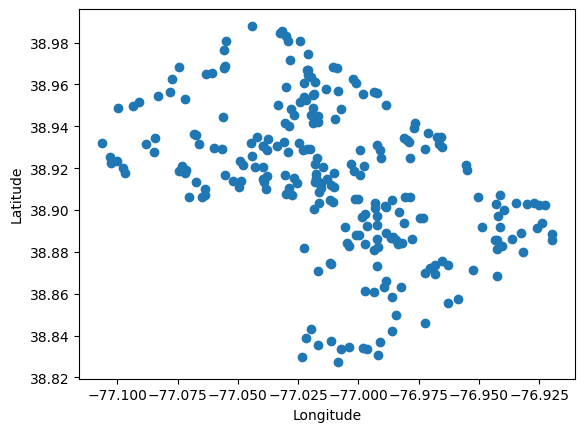

In [9]:
# Load data from file
bike_data = pd.read_csv("data/Ch5_bike_station_locations.csv")

# Plot data points
plt.scatter(bike_data["longitude"], bike_data["latitude"])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

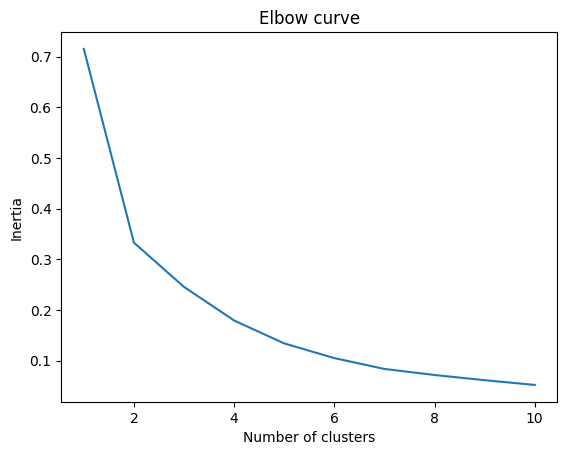

In [4]:
# Apply K-means clustering for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(bike_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

Exercice 2.2 - Lecture 7 :

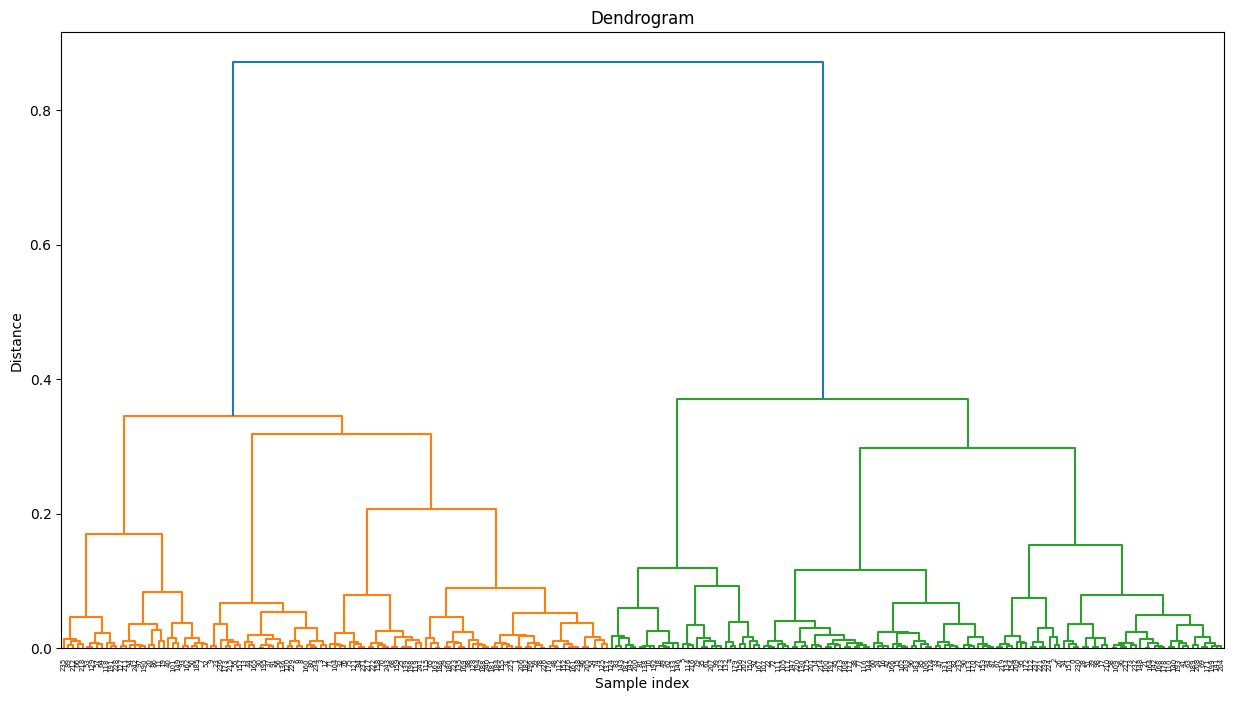

In [10]:
# Apply agglomerative clustering with linkage=ward
Z = linkage(bike_data, method="ward")

# Plot dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='level', p=10)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

To determine the best number of clusters, we can look at the height of each merging. The height represents the distance between the clusters being merged. A large increase in height indicates that the clusters being merged are far apart and may correspond to a good split. Based on the dendrogram, we can see that there are several large increases in height, which suggests that the dataset can be split into several clusters.

To choose the number of clusters, we can use the elbow method, which is based on the total within-cluster sum of squares (WSS) for each number of clusters. The number of clusters is chosen at the elbow of the WSS curve, where the rate of decrease in WSS starts to level off.

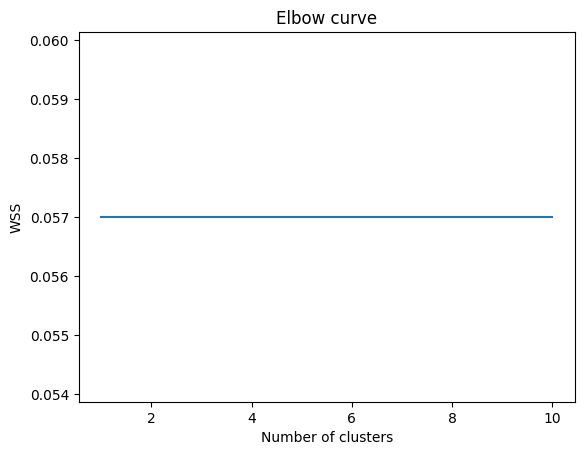

In [20]:
# Compute WSS for different values of k
wss = []
for k in range(1, 11):
    agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(bike_data)
    labels = pd.Series(agg_clustering.labels_, dtype=int)
    bike_data["label"] = labels.values
    cluster_centers = bike_data.groupby("label").mean()
    wss.append(((bike_data.set_index("label") - cluster_centers) ** 2).sum().values.sum())

# Plot WSS curve
plt.plot(range(1, 11), wss)
plt.title("Elbow curve")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.show()

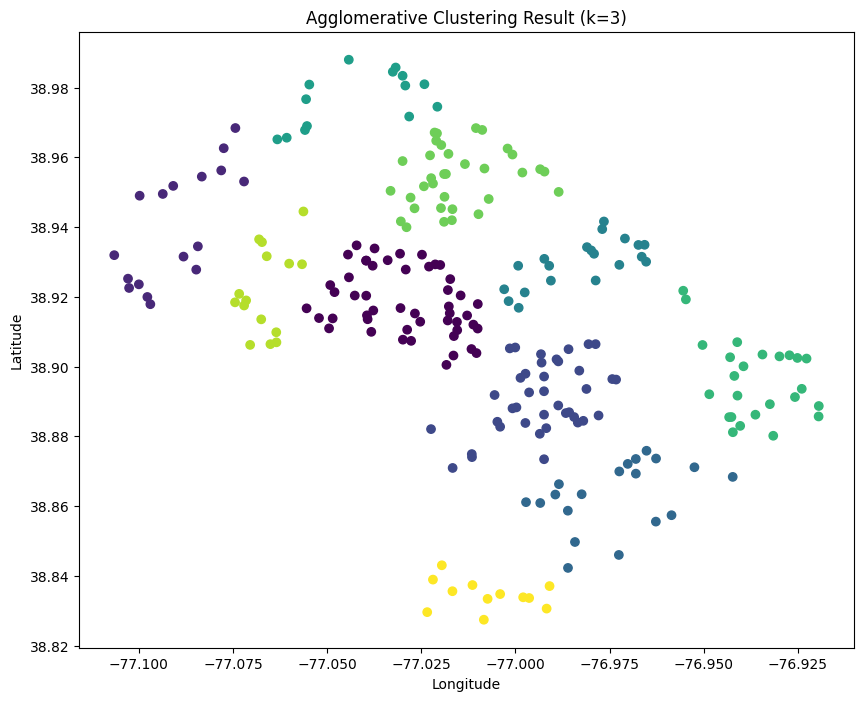

In [22]:
# Apply agglomerative clustering with k=3 or k=4
agg_clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(bike_data)
labels = pd.Series(agg_clustering.labels_, dtype=int)
bike_data["label"] = labels.values

# Visualize clustering result
plt.figure(figsize=(10, 8))
plt.scatter(bike_data["longitude"], bike_data["latitude"], c=bike_data["label"], cmap="viridis")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Agglomerative Clustering Result (k=3)")
plt.show()

Exerice 1 - Lecture 8 :

In [28]:
# Load data from file
df = pd.read_csv("data/Ch5_bike_station_locations.csv")
X = df.values

In [32]:
def apply_DBSCAN(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Calculate the Silhouette score
    score = silhouette_score(X, labels)
    
    return labels, score

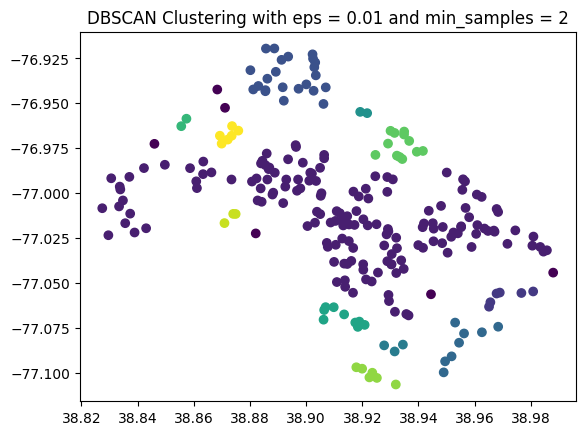

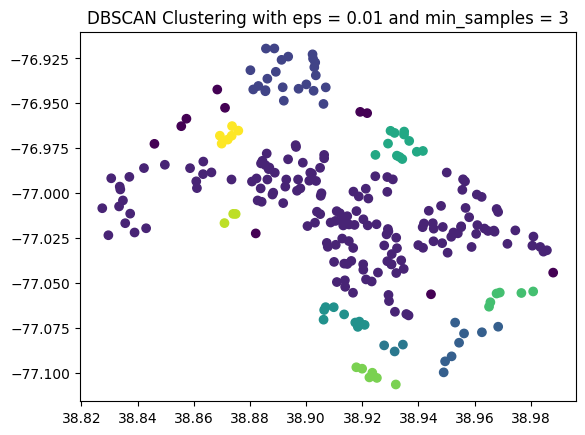

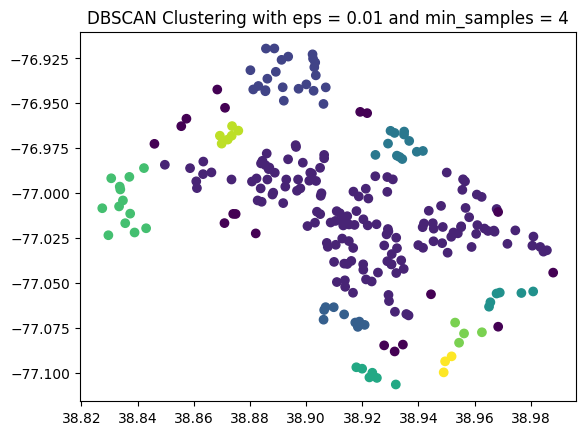

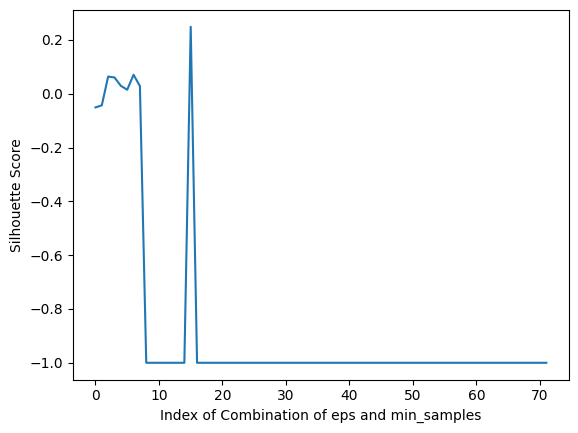

In [51]:
def apply_DBSCAN(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    
    # Check if there is more than one cluster
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
    else:
        score = -1
    
    return labels, score

# Define a range of values for eps and min_samples
eps_range = np.arange(0.01, 0.1, 0.01)
min_samples_range = range(2, 10)

# Initialize lists to store the results
labels_list = []
score_list = []

# Apply DBSCAN clustering and calculate Silhouette score for each combination of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        labels, score = apply_DBSCAN(X, eps, min_samples)
        labels_list.append(labels)
        score_list.append(score)

# Create a scatter plot of the data points, colored by cluster label
for i, labels in enumerate(labels_list):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=labels)
    plt.title('DBSCAN Clustering with eps = {} and min_samples = {}'.format(eps_range[i // len(min_samples_range)], min_samples_range[i % len(min_samples_range)]))
    plt.show()

    # stops after 3 iterations (prevent printing too many plots)
    if i == 2:
        break

# Create a line plot of the Silhouette scores for each combination of eps and min_samples
plt.figure()
plt.plot(score_list)
plt.xlabel('Index of Combination of eps and min_samples')
plt.ylabel('Silhouette Score')
plt.show()